In [7]:
# Import pustaka yang diperlukan
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import kaggle


In [8]:
# 1. Data Processing
# Memuat data
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
# Specify the directory where the dataset is located
data_dir = 'chest_xray/chest_xray/test'

def load_images_and_labels(data_dir):
    images = []
    labels = []
    
    for label in ['NORMAL', 'PNEUMONIA']:
        label_dir = os.path.join(data_dir, label)
        for img in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            img = cv2.resize(img, (150, 150))  # Resize to desired dimensions
            images.append(img)
            labels.append(0 if label == 'NORMAL' else 1)  # Assign label
            
    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(data_dir)

# Normalize the images
images = images / 255.0

# Reshape images to include the channel dimension (150, 150, 1)
images = np.expand_dims(images, axis=-1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f'Train set: {X_train.shape}, Test set: {X_test.shape}')

Train set: (499, 150, 150, 1), Test set: (125, 150, 150, 1)


In [ ]:
# 1. Data Processing
# Memuat data
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
# Specify the directory where the dataset is located
data_dir = 'chest_xray/chest_xray/test'

def load_images_and_labels(data_dir):
    images = []
    labels = []
    
    for label in ['NORMAL', 'PNEUMONIA']:
        label_dir = os.path.join(data_dir, label)
        for img in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            img = cv2.resize(img, (150, 150))  # Resize to desired dimensions
            images.append(img)
            labels.append(0 if label == 'NORMAL' else 1)  # Assign label
            
    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(data_dir)

# Normalize the images
images = images / 255.0

# Reshape images to include the channel dimension (150, 150, 1)
images = np.expand_dims(images, axis=-1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f'Train set: {X_train.shape}, Test set: {X_test.shape}')

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


c:\Program Files\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.6601 - loss: 0.9366 - val_accuracy: 0.5840 - val_loss: 0.6690
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.6191 - loss: 0.6462 - val_accuracy: 0.6080 - val_loss: 0.5926
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.7212 - loss: 0.5222 - val_accuracy: 0.8800 - val_loss: 0.3752
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.8637 - loss: 0.3371 - val_accuracy: 0.8240 - val_loss: 0.3992
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.8656 - loss: 0.3069 - val_accuracy: 0.8080 - val_loss: 0.4289
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.8758 - loss: 0.3097 - val_accuracy: 0.9120 - val_loss: 0.1801
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.9273 - loss: 0.1863 - val_accuracy: 0.9360 - val_loss: 0.2056
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.9446 - loss: 0.1524 - val_accuracy: 0.

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9579 - loss: 0.1310
Test accuracy: 0.9520000219345093


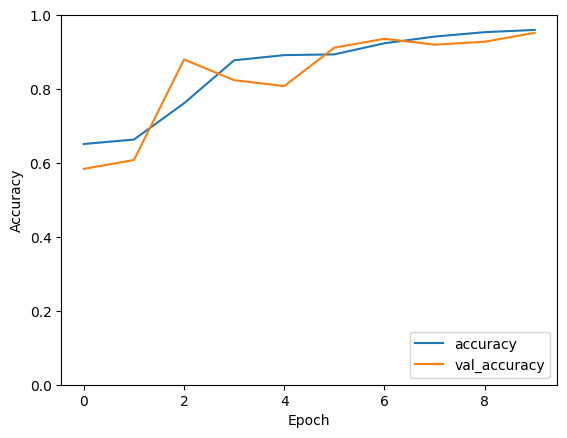

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [16]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["NORMAL", "PNEUMONIA"]))



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
              precision    recall  f1-score   support

      NORMAL       0.96      0.92      0.94        52
   PNEUMONIA       0.95      0.97      0.96        73

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125



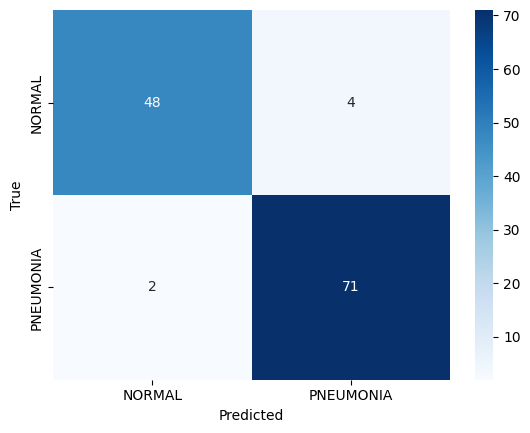

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["NORMAL", "PNEUMONIA"], yticklabels=["NORMAL", "PNEUMONIA"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [19]:
model.save('pneumonia_classification_model.h5')


In [20]:
from tensorflow.keras.models import load_model

loaded_model = load_model('pneumonia_classification_model.h5')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


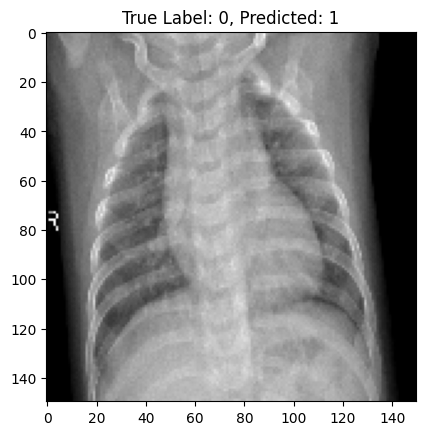

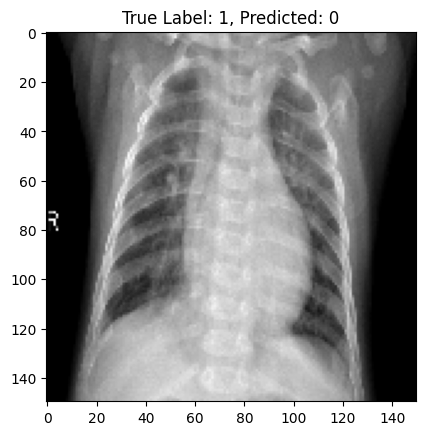

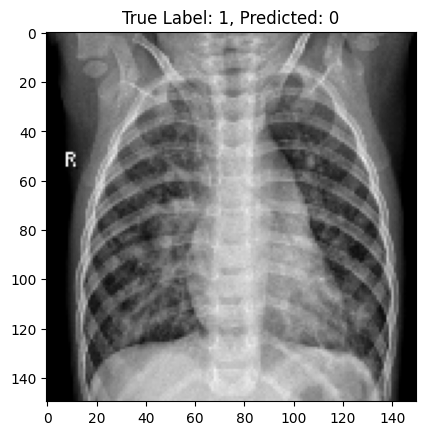

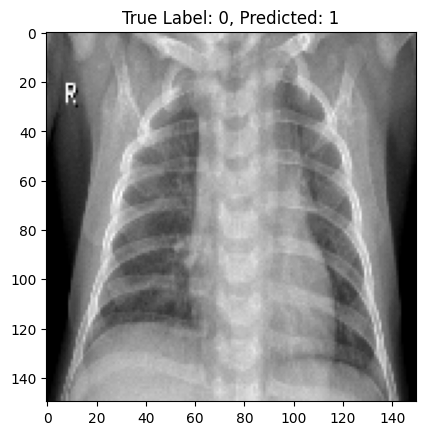

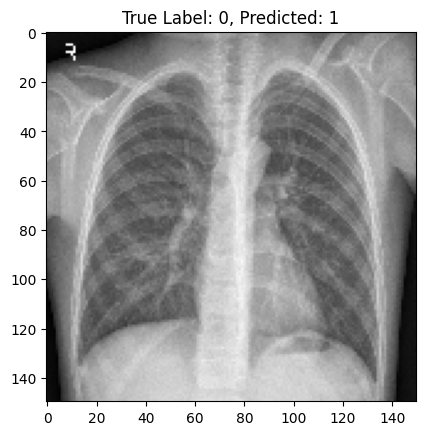

In [21]:
import numpy as np

# Predict class labels
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Identify misclassified indices
misclassified_indices = np.where(y_pred.reshape(-1) != y_test)[0]

# Visualize misclassified images
import matplotlib.pyplot as plt

for idx in misclassified_indices[:5]:  # Show first 5 misclassified images
    plt.imshow(X_test[idx].reshape(150, 150), cmap='gray')
    plt.title(f"True Label: {y_test[idx]}, Predicted: {y_pred[idx][0]}")
    plt.show()


In [22]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict(X_test).ravel()  # Flatten probabilities
roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_score:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
ROC AUC Score: 0.9897


In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Run a forward pass to initialize the model structure
_ = model.predict(np.expand_dims(X_test[0], axis=0))  # Run a forward pass to initialize the model

# Step 2: Verify the layer name by printing model summary
model.summary()  # Check the name of the last convolutional layer

# Step 3: Apply Grad-CAM
def get_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Step 4: Test Grad-CAM
sample_image = X_test[0]  # Select a test image
img_array = np.expand_dims(sample_image, axis=0)  # Expand dimensions for model input

# Use the verified layer name from model.summary()
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer_name='conv2d_2')  

# Step 5: Display the heatmap overlayed on the original image
plt.imshow(sample_image.reshape(150, 150), cmap='gray')
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap with some transparency
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,483,717 (55.25 MB)

 Trainable params: 4,827,905 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,655,812 (36.83 MB)

AttributeError: The layer sequential has never been called and thus has no defined output.

Predicted Class: 1 with Confidence: 0.92


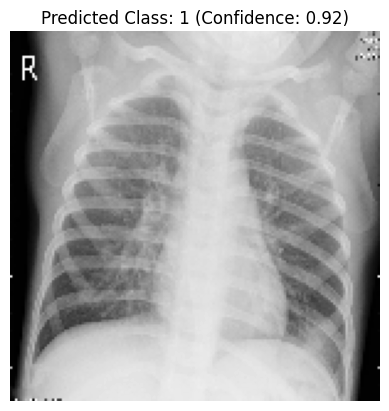

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Select a sample image from the test set
sample_image = X_test[0]
sample_image_expanded = np.expand_dims(sample_image, axis=0)  # Add batch dimension

# Define threshold for classification
threshold = 0.5

# Interpret the prediction based on the threshold
predicted_class = 1 if predictions[0][0] >= threshold else 0
confidence = predictions[0][0]

print(f"Predicted Class: {predicted_class} with Confidence: {confidence:.2f}")

# Display the sample image with the prediction label
plt.imshow(sample_image.reshape(150, 150), cmap='gray')
plt.title(f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")
plt.axis('off')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


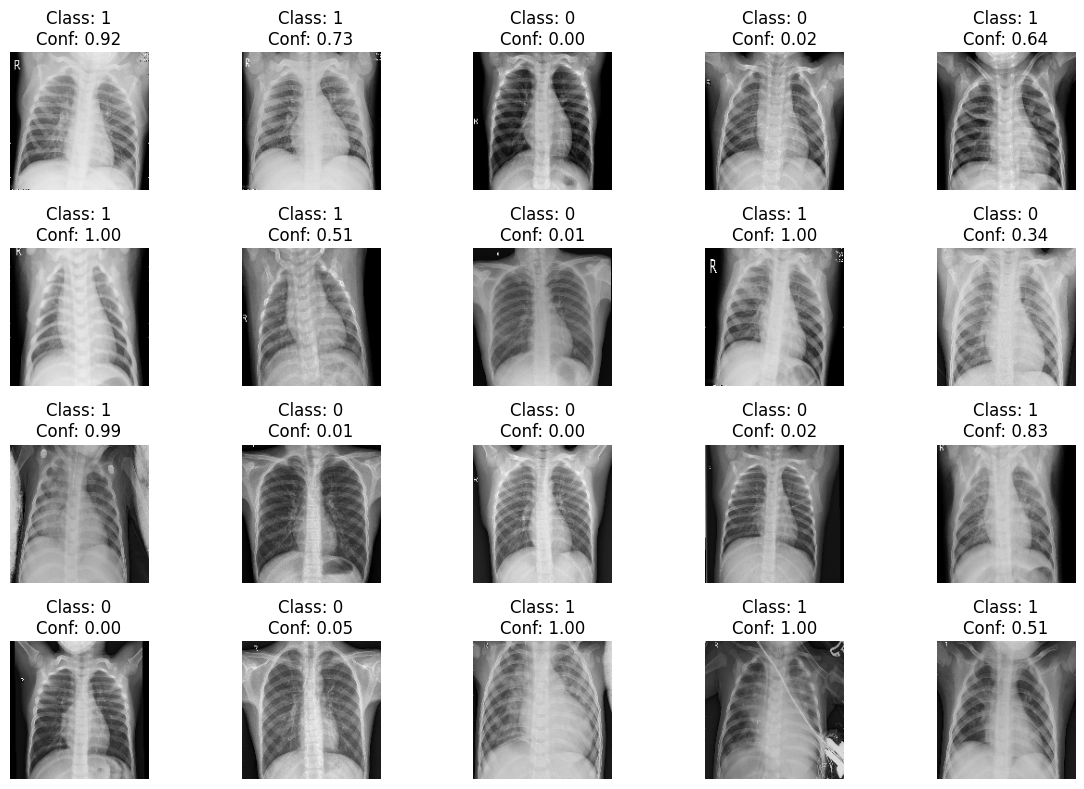

In [37]:
# Predict on a batch of test images
batch_predictions = model.predict(X_test[:20])  # Adjust the number of samples as needed

# Plot the results
plt.figure(figsize=(12, 8))
for i in range(20):  # Display the first 20 test samples
    plt.subplot(4, 5, i+1)  # Arrange in a 4x5 grid
    plt.imshow(X_test[i].reshape(150, 150), cmap='gray')
    predicted_class = 1 if batch_predictions[i][0] >= 0.5 else 0
    confidence = batch_predictions[i][0]
    plt.title(f"Class: {predicted_class}\nConf: {confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Evaluation Metrics:
Accuracy: 0.95
Precision: 0.95
Recall: 0.97
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.95      0.97      0.96        73

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125



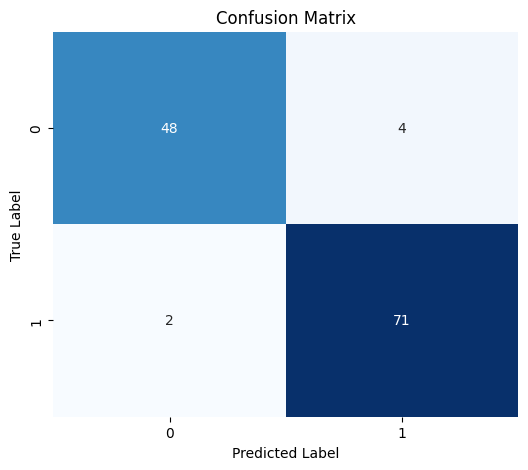

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Prediksi pada data test
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Konversi probabilitas ke kelas (0 atau 1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluasi
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
